### Rich non-graphical and graphical exploratory data analysis (EDA) (4)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Data overview
All variables used in the analysis contain no missing values after the data preparation step. Ratings and minimum order values are available for all 195 restaurants.

In [9]:
df = pd.read_csv("zurich_enriched_taxonomy.csv")
df.head()

,name,rating,minimum_clean,description_clean,primary_cuisine_group
0,mit&ohne kebab - HB,4.0,15.0,kebab,middle_eastern
1,Black Tap Craft Burgers & Beer Zurich,4.3,18.0,"amerikanisch, burger",american
2,Bierhalle Wolf,4.1,18.0,"snacks, getränke snacks",other
3,MrBeast Burger© Zürich,3.3,30.0,"snacks, amerikanisch",american
4,Starbucks Limmatstrasse,3.8,0.0,"frühstück, kaffee",other


In [10]:
os.makedirs("outputs/figures", exist_ok=True)


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   195 non-null    object 
 1   rating                 195 non-null    float64
 2   minimum_clean          195 non-null    float64
 3   description_clean      195 non-null    object 
 4   primary_cuisine_group  195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


,rating,minimum_clean
count,195.000000,195.000000
mean,4.264615,29.333333
std,0.497032,22.884665
min,1.700000,0.000000
25%,4.000000,20.000000
50%,4.300000,20.000000
75%,4.600000,30.000000
max,5.000000,150.000000


In [12]:
summary = (
    df.groupby("primary_cuisine_group")
      .agg(
          count_restaurants=("name", "count"),
          avg_rating=("rating", "mean"),
          avg_minimum=("minimum_clean", "mean"),
      )
      .sort_values("count_restaurants", ascending=False)
)

summary


,count_restaurants,avg_rating,avg_minimum
primary_cuisine_group,,,
asian,59,4.377966,31.711864
american,43,3.990698,24.604651
european,32,4.396875,29.156250
middle_eastern,32,4.200000,26.937500
other,12,4.250000,59.500000
grocery_retail,10,4.380000,14.200000
african,6,4.616667,20.000000
latin,1,4.100000,20.000000


In [13]:
summary.round(2)

,count_restaurants,avg_rating,avg_minimum
primary_cuisine_group,,,
asian,59,4.38,31.71
american,43,3.99,24.60
european,32,4.40,29.16
middle_eastern,32,4.20,26.94
other,12,4.25,59.50
grocery_retail,10,4.38,14.20
african,6,4.62,20.00
latin,1,4.10,20.00


### Interpretation
Restaurant ratings are generally high indicating positive customer evaluations across most restaurants.In contrast, minimum order values vary substantially which points to heterogeneous pricing strategies.

Grouped summaries show moderate differences across cuisine groups. African, European, and Asian restaurants exhibit the highest average ratings, while American restaurants show slightly lower average ratings despite being one of the largest groups. Minimum order values also differ by cuisine, with the “other” category displaying notably higher average minimum orders. Results for cuisine groups with very small sample sizes should be interpreted with caution.

In [14]:
sns.set_theme(style="whitegrid")

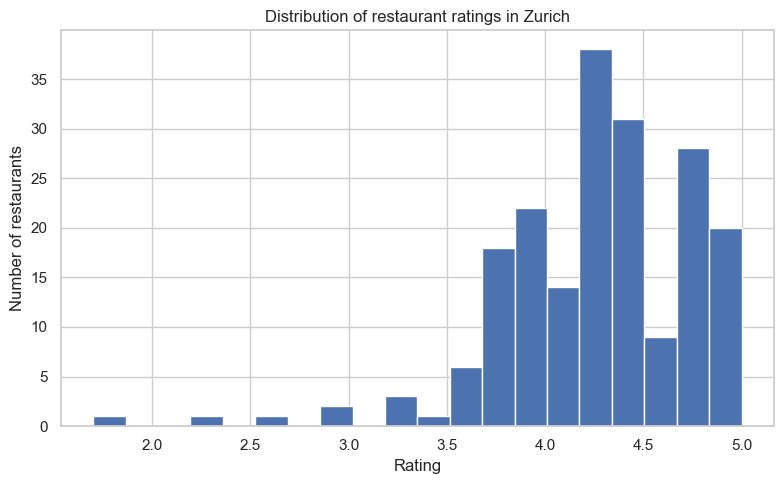

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df["rating"], bins=20)
plt.xlabel("Rating")
plt.ylabel("Number of restaurants")
plt.title("Distribution of restaurant ratings in Zurich")
plt.tight_layout()

plt.savefig("outputs/figures/hist_rating.png")
plt.show()


## Interpretation (Rating Distribution)

The histogram shows that restaurant ratings in Zurich are strongly concentrated between 4.0 and 4.8, indicating generally high customer satisfaction. Very low ratings are rare, with only a small number of restaurants rated below 3.0. The distribution is slightly left-skewed, reflecting a prevalence of higher ratings and limited dispersion overall.

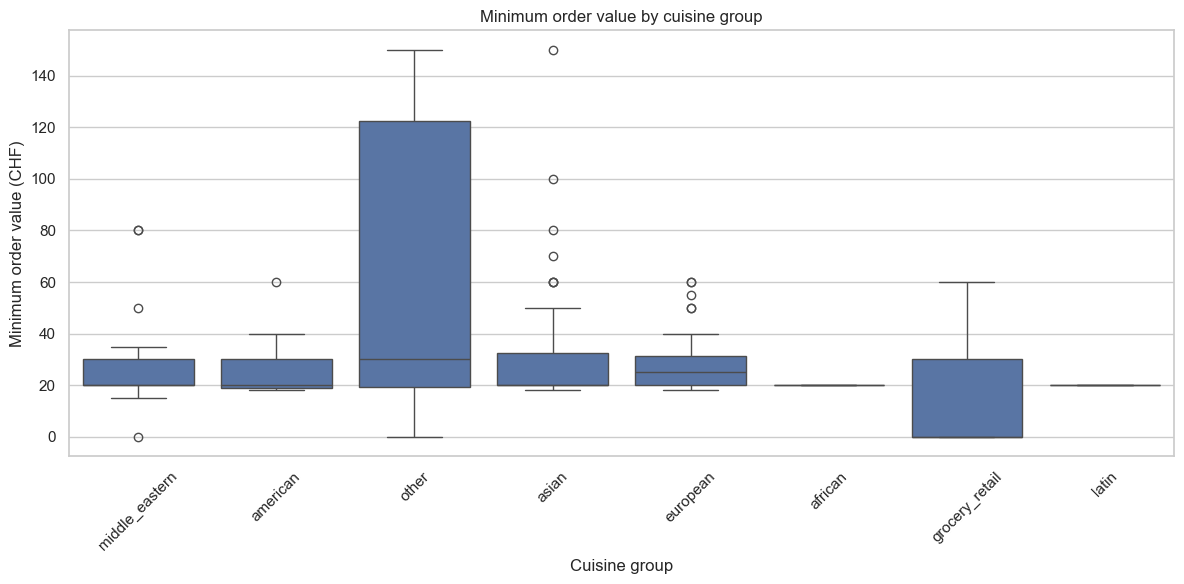

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="primary_cuisine_group",
    y="minimum_clean"
)

plt.xticks(rotation=45)
plt.xlabel("Cuisine group")
plt.ylabel("Minimum order value (CHF)")
plt.title("Minimum order value by cuisine group")
plt.tight_layout()

plt.savefig("outputs/figures/box_minimum_by_cuisine.png")
plt.show()


## Interpretation (Minimum Order Value by Cuisine Group)

The boxplot shows clear differences in minimum order values across cuisine groups. Most cuisine groups, such as Asian, American, European, and Middle Eastern restaurants, exhibit similar median minimum order values around 20–25 CHF. In contrast, the “other” category displays substantially higher variability and several extreme values, indicating heterogeneous pricing structures within this group. Grocery retail outlets tend to have lower minimum order requirements, including several zero values. Results for cuisine groups with small sample sizes should be interpreted with caution.

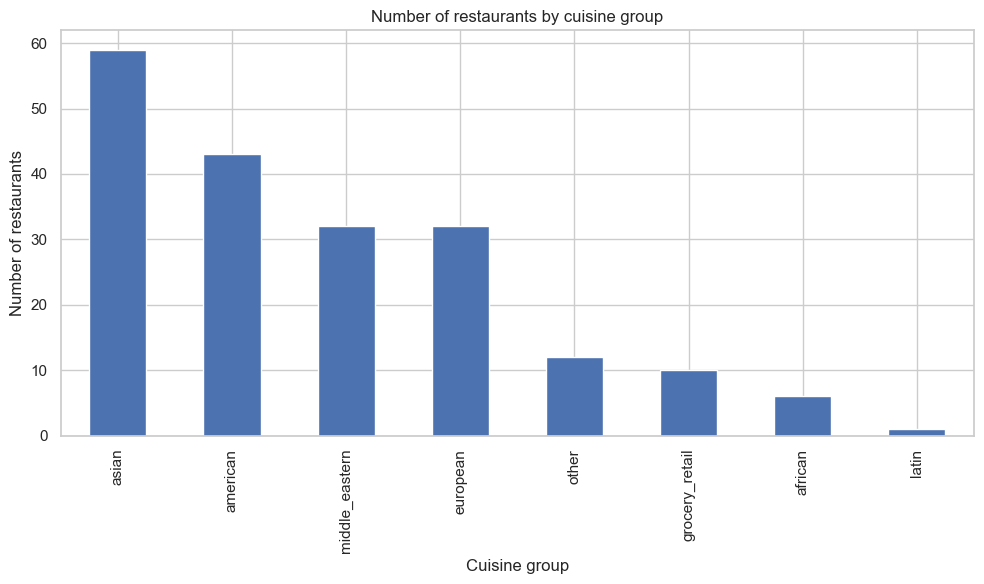

In [17]:
plt.figure(figsize=(10, 6))

df["primary_cuisine_group"].value_counts().plot(kind="bar")

plt.xlabel("Cuisine group")
plt.ylabel("Number of restaurants")
plt.title("Number of restaurants by cuisine group")
plt.tight_layout()

plt.savefig("outputs/figures/bar_restaurants_by_cuisine.png")
plt.show()


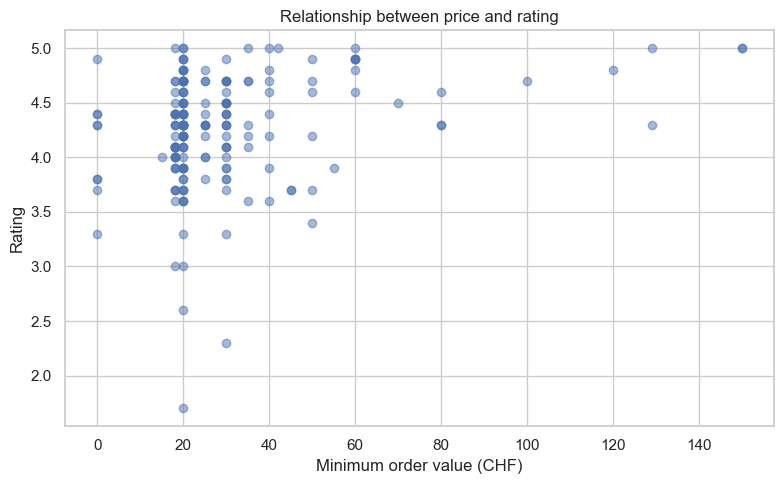

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df["minimum_clean"],
    df["rating"],
    alpha=0.5
)

plt.xlabel("Minimum order value (CHF)")
plt.ylabel("Rating")
plt.title("Relationship between price and rating")
plt.tight_layout()

plt.savefig("outputs/figures/scatter_price_rating.png")
plt.show()


## Interpretation (Minimum Order Value vs. Rating)

The scatterplot suggests a weak positive association between minimum order value and restaurant rating. Restaurants with higher minimum order values tend to receive slightly higher ratings, although substantial variability is present across all price levels. Most observations are concentrated at minimum order values between 15 and 30 CHF, where ratings range broadly from approximately 3.5 to 5.0, indicating that higher prices do not guarantee higher ratings.

# Geographical Scope and Visualization

Zurich represents the geographical scope of the study.  
The geographical visualization is used to provide spatial context for the dataset and is not intended to analyse or represent the exact locations of individual restaurants.

As the dataset does not contain address-level or coordinate information, a detailed location-based analysis is not feasible.  
Instead, the city of Zurich is visualized as the spatial frame of reference for the analysis in order to clearly communicate the geographical boundaries of the study.


In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [20]:
!pip install folium


In [22]:
# ============================================================
# Geographical Scope Visualization
# City of Zurich (study area) + Canton of Zurich (context)
# ============================================================

import folium
import os

# ------------------------------------------------------------
# Output directory
# ------------------------------------------------------------
os.makedirs("outputs/maps", exist_ok=True)

# ------------------------------------------------------------
# Map center (Zurich city center)
# ------------------------------------------------------------
zurich_center = (47.3769, 8.5417)

# ------------------------------------------------------------
# Bounding box: City of Zurich (approximate, visualization only)
# ------------------------------------------------------------
city_min_lon, city_min_lat = 8.45, 47.32
city_max_lon, city_max_lat = 8.65, 47.45

# ------------------------------------------------------------
# Bounding box: Canton of Zurich (approximate, context)
# ------------------------------------------------------------
canton_min_lon, canton_min_lat = 8.30, 47.20
canton_max_lon, canton_max_lat = 8.90, 47.70

# ------------------------------------------------------------
# Create base map
# ------------------------------------------------------------
m = folium.Map(
    location=zurich_center,
    zoom_start=11,
    tiles="OpenStreetMap"
)

# ------------------------------------------------------------
# City center marker
# ------------------------------------------------------------
folium.Marker(
    location=zurich_center,
    popup="Zurich – Study Area",
    icon=folium.Icon(color="blue", icon="info-sign")
).add_to(m)

# ------------------------------------------------------------
# City Zurich boundary (study area)
# ------------------------------------------------------------
folium.Rectangle(
    bounds=[
        (city_min_lat, city_min_lon),
        (city_max_lat, city_max_lon)
    ],
    color="red",
    weight=3,
    fill=True,
    fill_opacity=0.15,
    tooltip="City of Zurich (study area)"
).add_to(m)

# ------------------------------------------------------------
# Save map
# ------------------------------------------------------------
output_path = "outputs/maps/zurich_scope_map.html"
m.save(output_path)

output_path


'outputs/maps/zurich_scope_map.html'

# Statistical Modeling and Hypothesis Testing (5)

The objective of this section is to examine whether restaurant characteristics
can explain variations in customer ratings.

In particular, the analysis investigates:
- Whether the minimum order value is associated with restaurant ratings
- Whether restaurant ratings differ significantly across cuisine groups

To address these questions, regression analysis and statistical hypothesis tests
are applied.


In [5]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats


In [6]:
df = pd.read_csv("zurich_enriched_taxonomy.csv")


In [7]:
model = smf.ols(
    formula="rating ~ minimum_clean + C(primary_cuisine_group)",
    data=df
).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     5.576
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           2.46e-06
Time:                        15:19:40   Log-Likelihood:                -118.91
No. Observations:                 195   AIC:                             255.8
Df Residuals:                     186   BIC:                             285.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      4.4860      0.189     23.775      0.000       4.114       4.858
C(primary_cuisine_group)[T.american]          -0.6561      0.199     -3.300      0.001      -1.048      -0.264
C(primary_cuisine_group)[T.asian]             -0.3152      0.196     -1.607      0.110      -0.702       0.072
C(primary_cuisine_group)[T.european]          -0.2796      0.203     -1.375      0.171      -0.681       0.121
C(primary_cuisine_group)[T.grocery_retail]    -0.1988      0.236     -0.844      0.400      -0.664       0.266
C(primary_cuisine_group)[T.latin]             -0.5167      0.492     -1.049      0.295      -1.488       0.455
C(primary_cuisine_group)[T.middle_eastern]    -0.4620      0.203     -2.275      0.024      -0.863      -0.061
C(primary_cuisine_group)[T.other]             -0.6248      0.236     -2.647      0.009      -1.090      -0.159
minimum_clean                                  0.0065      0.002      4.212      0.000       0.003       0.010
==============================================================================
Omnibus:                       64.783   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.342
Skew:                          -1.387   Prob(JB):                     1.26e-41
Kurtosis:                       6.936   Cond. No.                         663.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Statistical Modeling and Hypothesis Testing (5)

This section applies statistical modeling and hypothesis testing techniques 
to examine whether restaurant characteristics are associated with customer ratings.

Specifically, the analysis addresses:
- Whether the minimum order value is associated with restaurant ratings
- Whether average ratings differ significantly across cuisine groups


### Linear Regression Results

A linear regression model was estimated with restaurant rating as the dependent variable,
and minimum order value as well as cuisine group as explanatory variables.

The overall model is statistically significant (F-test p-value < 0.001), indicating that
the included variables jointly explain variation in restaurant ratings. The R-squared value
(0.19) suggests a moderate explanatory power, which is reasonable for observational data.

The coefficient for the minimum order value is positive and statistically significant 
(p < 0.001), indicating that restaurants with higher minimum order values tend to have
slightly higher ratings on average.

Several cuisine groups show statistically significant differences in ratings compared
to the reference category, suggesting that cuisine type is associated with customer ratings.


In [8]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# One-way ANOVA: ratings by cuisine group
anova_model = ols(
    "rating ~ C(primary_cuisine_group)",
    data=df
).fit()

anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(primary_cuisine_group),5.584190,7.0,3.523189,0.00141
Residual,42.341656,187.0,NaN,NaN


### One-way ANOVA Results

A one-way Analysis of Variance (ANOVA) was conducted to examine whether mean
restaurant ratings differ across primary cuisine groups.

The ANOVA results indicate a statistically significant effect of cuisine group
on restaurant ratings (F = 3.52, p = 0.0014). Since the p-value is well below the
conventional significance level of 0.05, the null hypothesis of equal mean
ratings across all cuisine groups is rejected.

This finding suggests that at least one cuisine group has a mean rating that
differs significantly from the others. Therefore, cuisine type appears to be
associated with differences in customer ratings.


## Model Evaluation (6)

The performance of the linear regression model is evaluated using standard
measures of model fit, including R-squared and Root Mean Squared Error (RMSE).


In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predicted ratings
df["rating_pred"] = model.predict(df)

# RMSE
rmse = np.sqrt(mean_squared_error(df["rating"], df["rating_pred"]))
rmse


0.4452333531984045

### Interpretation of Model Evaluation Metrics

The Root Mean Squared Error (RMSE) of approximately **0.45** indicates that the
model’s predicted restaurant ratings deviate on average by about 0.45 rating
points from the observed values.

Given that ratings are measured on a relatively narrow scale (approximately 1
to 5), this error magnitude suggests a moderate predictive accuracy. While the
model captures general patterns in the data, substantial unexplained variation
remains.

Together with the relatively low R-squared value, these results indicate that
restaurant ratings are influenced by additional factors not included in the
model, such as service quality, food consistency, or customer-specific
preferences.


### K-Means Clustering

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [12]:
# Auswahl numerischer Variablen für Clustering
X = df[["rating", "minimum_clean"]].copy()

# Standardisierung (sehr wichtig für K-Means!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\imana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\imana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\imana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\imana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

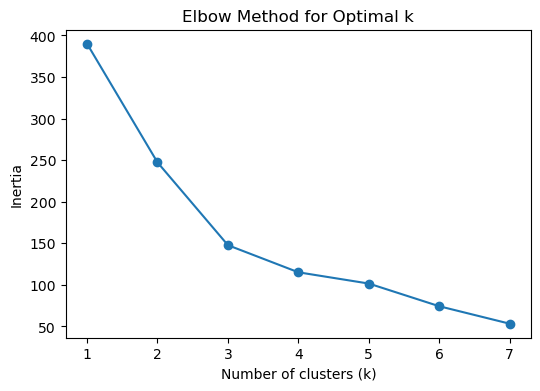

In [13]:
inertia = []
k_range = range(1, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [14]:
# Finales K-Means-Modell
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

df[["rating", "minimum_clean", "cluster"]].head()


c:\Users\imana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,rating,minimum_clean,cluster
0,4.0,15.0,0
1,4.3,18.0,2
2,4.1,18.0,2
3,3.3,30.0,0
4,3.8,0.0,0


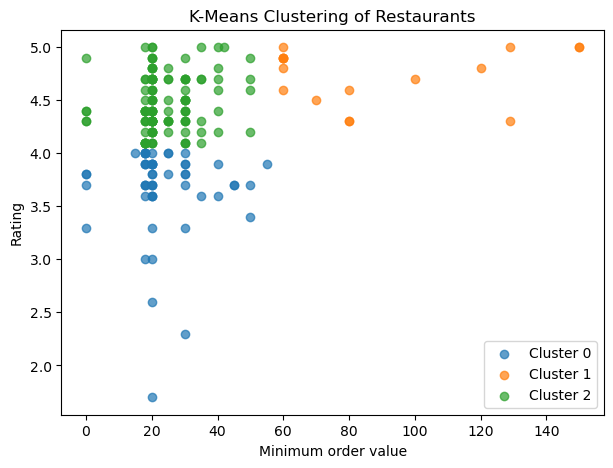

In [15]:
plt.figure(figsize=(7, 5))

for cluster in sorted(df["cluster"].unique()):
    subset = df[df["cluster"] == cluster]
    plt.scatter(
        subset["minimum_clean"],
        subset["rating"],
        label=f"Cluster {cluster}",
        alpha=0.7
    )

plt.xlabel("Minimum order value")
plt.ylabel("Rating")
plt.title("K-Means Clustering of Restaurants")
plt.legend()
plt.show()


In [16]:
cluster_summary = (
    df.groupby("cluster")
    .agg(
        count=("name", "count"),
        avg_rating=("rating", "mean"),
        avg_minimum=("minimum_clean", "mean")
    )
)

cluster_summary


,count,avg_rating,avg_minimum
cluster,,,
0,55,3.665455,23.345455
1,17,4.735294,88.705882
2,123,4.467480,23.804878



## Cluster Interpretation

The K-means clustering identifies three distinct restaurant profiles based on
minimum order value and customer ratings:

**Cluster 0 – Low-rated, low minimum order restaurants**  
Restaurants in this cluster have relatively low minimum order values and the
lowest average ratings. These establishments may prioritise affordability and
accessibility but receive weaker customer evaluations on average.

**Cluster 1 – High-rated, high minimum order restaurants**  
This cluster consists of restaurants with substantially higher minimum order
values and the highest average ratings. These restaurants likely represent more
premium or specialised offerings where customers are willing to pay higher
minimums for perceived quality.

**Cluster 2 – High-rated, moderate minimum order restaurants**  
Restaurants in this cluster combine moderate minimum order values with
consistently high ratings. This group represents well-rated mainstream
restaurants that balance affordability and customer satisfaction.

Overall, the clustering suggests that minimum order value and rating jointly
define meaningful restaurant segments, complementing the findings from the
regression and ANOVA analyses.


### Methodological Value 

K-Means provides an unsupervised perspective on the data

The results support findings from:

Regression analysis (association with minimum order value)

ANOVA (differences across groups)

No labels were used → pure data-driven segmentation

### Clustering Quality Evaluation (Silhouette Score)

In [17]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, df["cluster"])
silhouette


0.4469426376005613

### Clustering Quality Evaluation

The silhouette score of **0.45** indicates a moderate to good separation between
the identified clusters. This suggests that the clustering solution captures
meaningful structure in the data, with restaurants being more similar to others
within the same cluster than to those in different clusters.

Given the limited number of numerical features used (rating and minimum order
value), this silhouette score reflects a reasonable clustering quality.
Some overlap between clusters is expected, but the overall segmentation remains
informative and suitable for exploratory analysis.
